<a href="https://colab.research.google.com/github/blandersonw/MachineLearning/blob/main/HW2_1_BlakeAnderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2. 

You will repeat the main procedures from Lecture 2 in much simplified steps using a different data set (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

1. Download the data using urllib and read the file into pandas dataframe. The url for data is "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

2. Print the statistics of continuous variables. Note that "medv" is our target variable.

3. Examine the variables and list top five variables that correlates the most (either positively or negatively) with "medv". What are the correlation values?

3. Create a pipeline of simple median imputer and standard scaler. How many elements are missing for each variable?

4. Set the random seed to 0. Split the training (80%) and the test set (20%) using scikit-learn (no stratified sampling necessary.)

5. Fit a linear regression model to the training data. Report Training MAE and Test MAE.

NOTE: Add comments for each step such as your observations on the results, etc. To make grading easy, please leave all cell open and leave the results.

IMPORTING LIBRARIES + EXTENSIONS

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

DOWNLOAD DATA INTO DATAFRAME

In [ ]:
import os
import tarfile
import urllib.request
import pandas as pd

url = ("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

boston =pd.read_csv(url)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Plotting each column by frequency in order to visualize data.  Not necessary for homework.

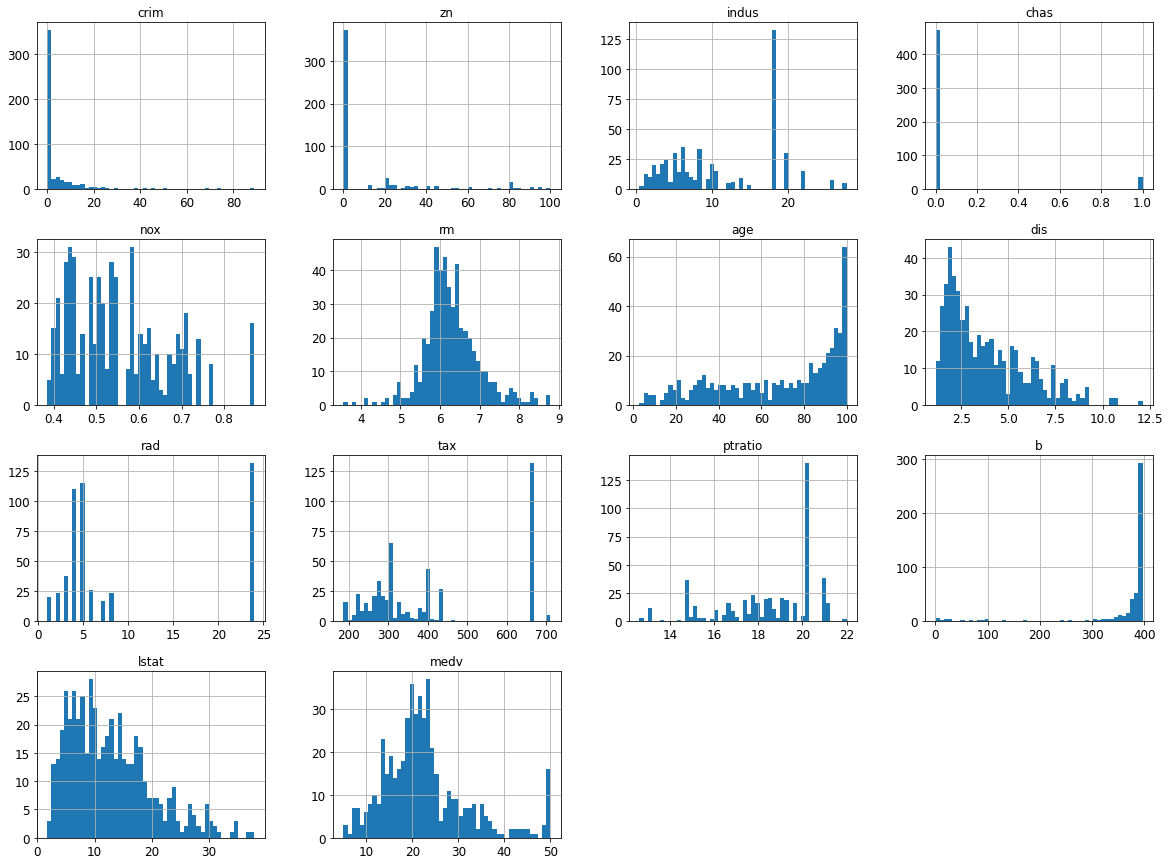

In [ ]:
import matplotlib.pyplot as plt
boston.hist(bins=50, figsize=(20,15))
plt.show()

PLOT STATISTICS OF CONTINUOUS VARIABLES

In [ ]:
print(boston['crim'].describe(), '\n')
print(boston['indus'].describe(), '\n')
print(boston['nox'].describe(), '\n')
print(boston['rm'].describe(), '\n')
print(boston['age'].describe(), '\n')
print(boston['dis'].describe(), '\n')
print(boston['ptratio'].describe(), '\n')
print(boston['b'].describe(), '\n')
print(boston['lstat'].describe(), '\n')
print(boston['medv'].describe(), '\n')

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64 

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: indus, dtype: float64 

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: nox, dtype: float64 

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: rm, dtype: float64 

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: age, dtype: float64 

count    506.000000
mean       3.795043
std        2.10571

In [ ]:
#creating a dictionary with correlation values
corr_values = {}

#instantiating function, name is column to compare correlations to
def corr1(name):

  #iterate through column names
  for i in boston:

    #find correlation
    corr = boston[i].corr(boston[name])

    #check if correlation negative, add to dictionary
    if corr<0 and name!=i:
      corr_values[i + ' and ' + name + ' (neg)'] = -corr

    #check if correlation positive, add to dictionary
    elif corr>=0 and name!=i:
      corr_values[i + ' and medv (pos)'] = corr

  #sort a maxes list with the 5 largest values
  maxes = sorted(corr_values, key=corr_values.get, reverse=True)[:5]

  #print the 5 largest values
  for i in maxes:
    print(i, corr_values[i])

corr1("medv")

lstat and medv (neg) 0.7376627261740151
rm and medv (pos) 0.6953599470715393
ptratio and medv (neg) 0.5077866855375616
indus and medv (neg) 0.48372516002837357
tax and medv (neg) 0.46853593356776685


In [ ]:
corr_matrix = boston.corr()
corr_matrix["medv"].sort_values(ascending=False)
#This is the more efficient way to find correlation values

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

Code below not necessary, misinterpreted question at first

In [ ]:
def median(name):
  sorted_list = sorted(boston[name])
  length = len(sorted_list)
  if length % 2 == 0:
    med = (sorted_list[length//2] + sorted_list[length//2-1])/2
  else:
    med = sorted_list[length//2]
  return(med)

for column in boston:
  print('median is ', median(column))
  print('mean is ', boston[column].mean())

median is  0.25651
mean is  3.613523557312254
median is  0.0
mean is  11.363636363636363
median is  9.69
mean is  11.13677865612648
median is  0.0
mean is  0.0691699604743083
median is  0.538
mean is  0.5546950592885376
median is  6.2085
mean is  6.284634387351779
median is  77.5
mean is  68.57490118577076
median is  3.2074499999999997
mean is  3.795042687747036
median is  5.0
mean is  9.549407114624506
median is  330.0
mean is  408.2371541501976
median is  19.05
mean is  18.455533596837945
median is  391.44
mean is  356.6740316205534
median is  11.36
mean is  12.653063241106722
median is  21.2
mean is  22.532806324110677


Adding sklearn median imputer

In [ ]:
from sklearn.impute import SimpleImputer

#set up imputer
imputer = SimpleImputer(strategy='median', missing_values=np.nan)

#fit imputer to boston
imputer.fit(boston)

#print imputer medians
imputer.statistics_

#zero missing data

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20850e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01, 2.12000e+01])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#initialize standard scaler pipeline
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

#apply imputer and standard scaler pipeline
boston_tr = num_pipeline.fit_transform(boston)
boston_tr

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [ ]:
from sklearn.model_selection import train_test_split

#create dataframe with input variables
bostonX = boston.drop(columns=['medv'])

#create dataframe with output variables
bostonY = boston['medv']

#splitting test and training sets
X_train, X_test, Y_train, Y_test = train_test_split(bostonX, bostonY, test_size=0.20, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
#importing more sklearn models

#applying regression model to training data
train_reg = LinearRegression()
train_reg.fit(X_train, Y_train)

#calculate mean absolute error for trainijng set
train_predictvals = train_reg.predict(X_train)
train_mae = mean_absolute_error(Y_train, train_predictvals)
train_mae



3.1031563965794313

In [ ]:
#applying regression model to training data
test_reg = LinearRegression()
test_reg.fit(X_test, Y_test)

#calculate mean absolute error for training set
test_predictvals = test_reg.predict(X_test)
test_mae = mean_absolute_error(Y_test, test_predictvals)
test_mae

3.6685531077854945